# Lab 2 :  House Pricing Prediction using Regression Models

## Step 1 : Import libraries

In [19]:
# Importing necessary libraries
import numpy as np # import de numpy
import pandas as pd # import de pandas
from sklearn.model_selection import train_test_split # import de train test split to split the dataset into train and test set 
from sklearn.linear_model import LinearRegression # import linear regression model
from sklearn.preprocessing import PolynomialFeatures #import polynomial features
import matplotlib.pyplot as plt 


## Step 2 : import Dataset from Csv File

In [20]:
# Load the dataset form .csv
house_data = pd.read_csv('./Housing.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
house_data.head()

Dataset preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 3 : Select only numerical features for simplicity of the lab

In [21]:
numerical_features = house_data.select_dtypes(include=[np.number])
print ("Here are the features we kept, only numerical features")
numerical_features.head()

Here are the features we kept, only numerical features


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [25]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


## Step 4 : Explore the Dataset

In [31]:
numerical_features.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
data = numerical_features
data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


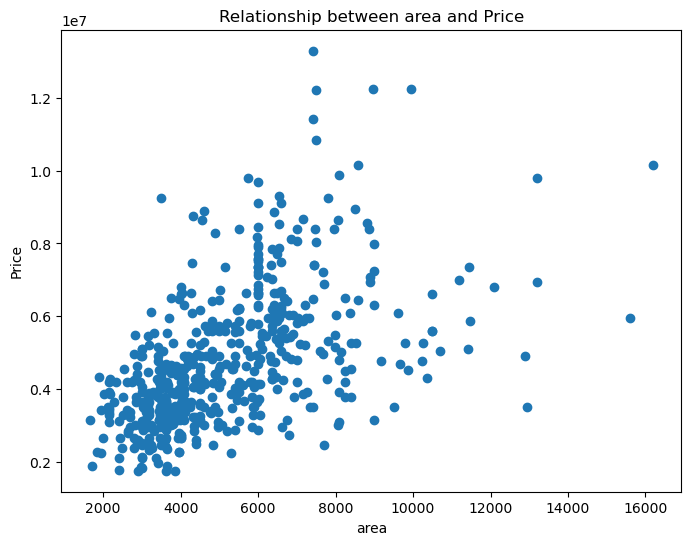

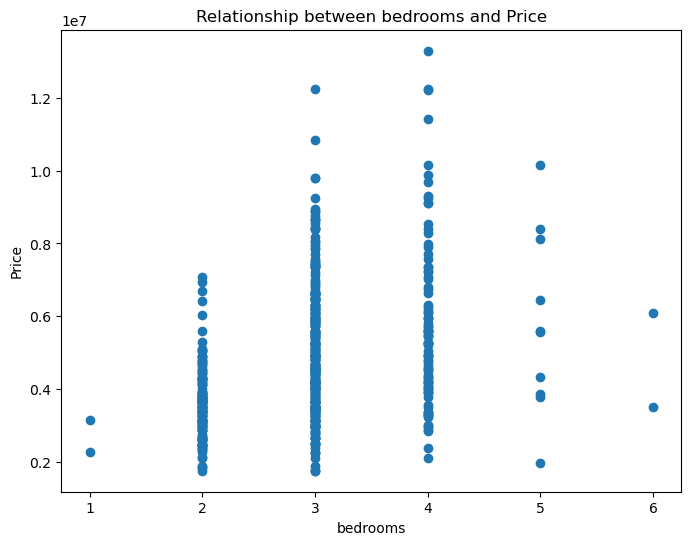

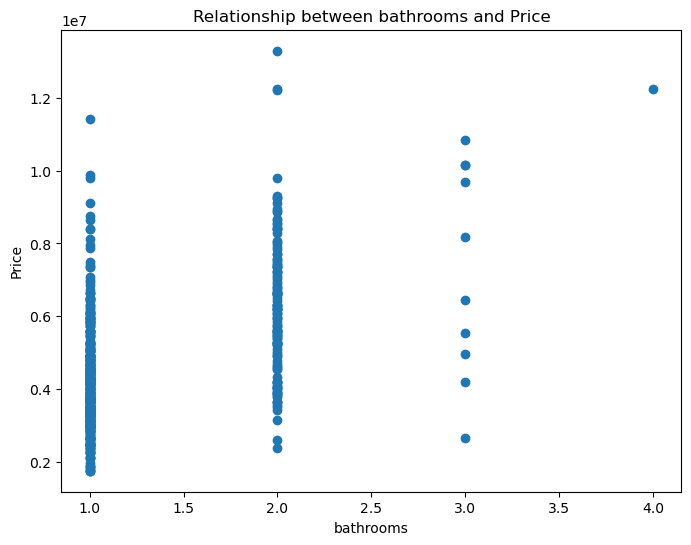

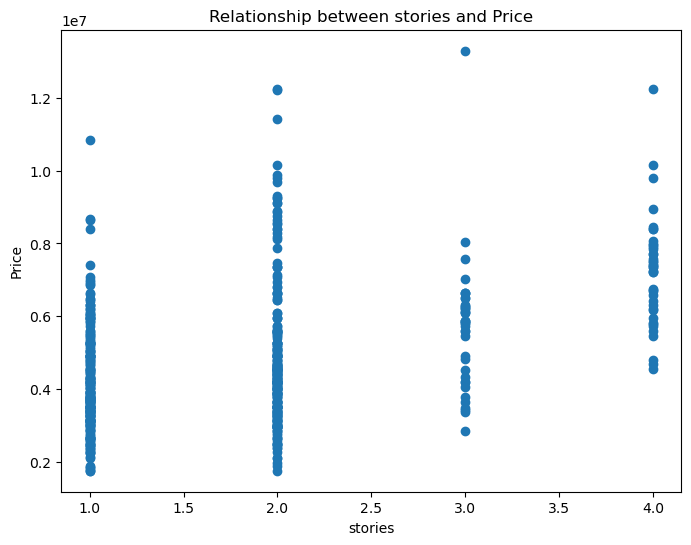

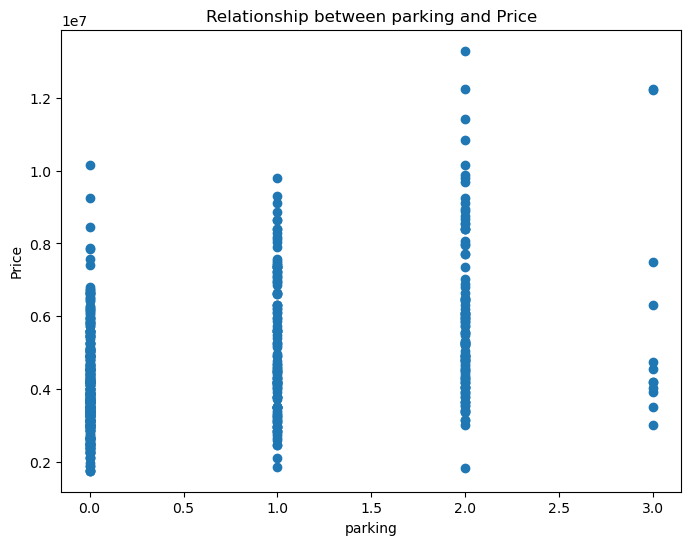

In [34]:
# Scatter plots to show relationship between each Feature and the Price
features = ['area','bedrooms','bathrooms','stories','parking']

for column in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[column], y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Relationship between {column} and Price')
    plt.show()


## Step 5 : Split the dataset

In [11]:
# Split the dataset into Features (X) and Target variable (y)
X = numerical_features.drop(columns=['price'])  # here we drop the price because it is the target variable
y = numerical_features['price']  # Target variable "price"

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 6 : Train and Predict Models 

### Model 1 - Linear Regression

In [12]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

### Model 2 - Polynomial Regression 

In [13]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_pred = poly_reg.predict(X_test_poly)

## Step 7 : Evaluate the models 

### Plotting real vs predicted values for Linear Regression

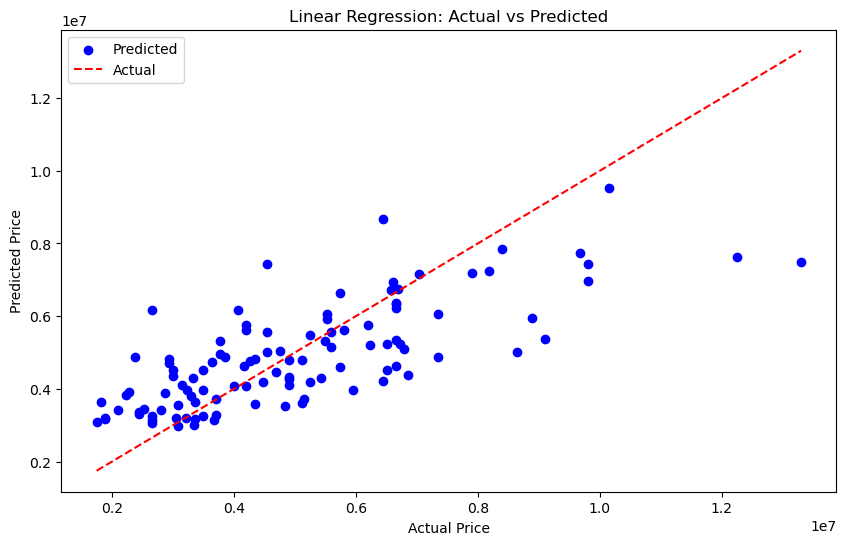

In [14]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


### Plotting real vs predicted values for Polynomial Regression

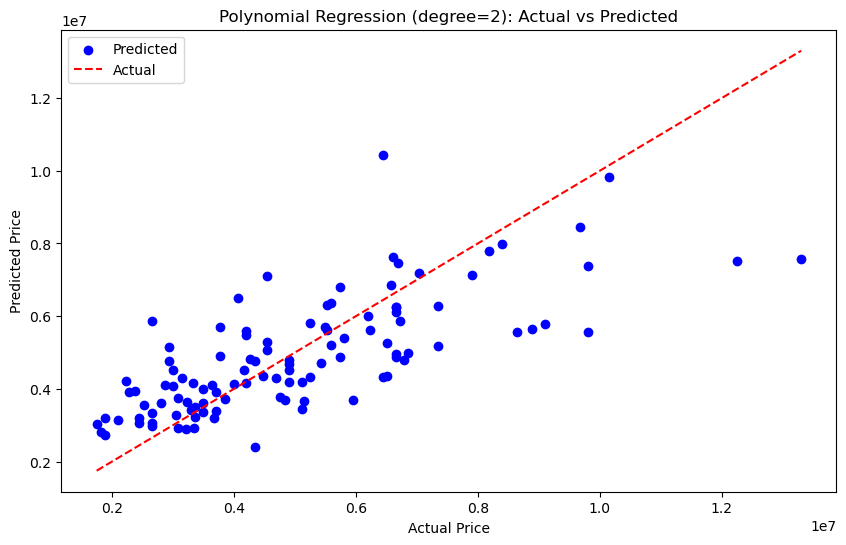

In [16]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, poly_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Polynomial Regression (degree=2): Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Calculate correlation matrix for the entire dataset

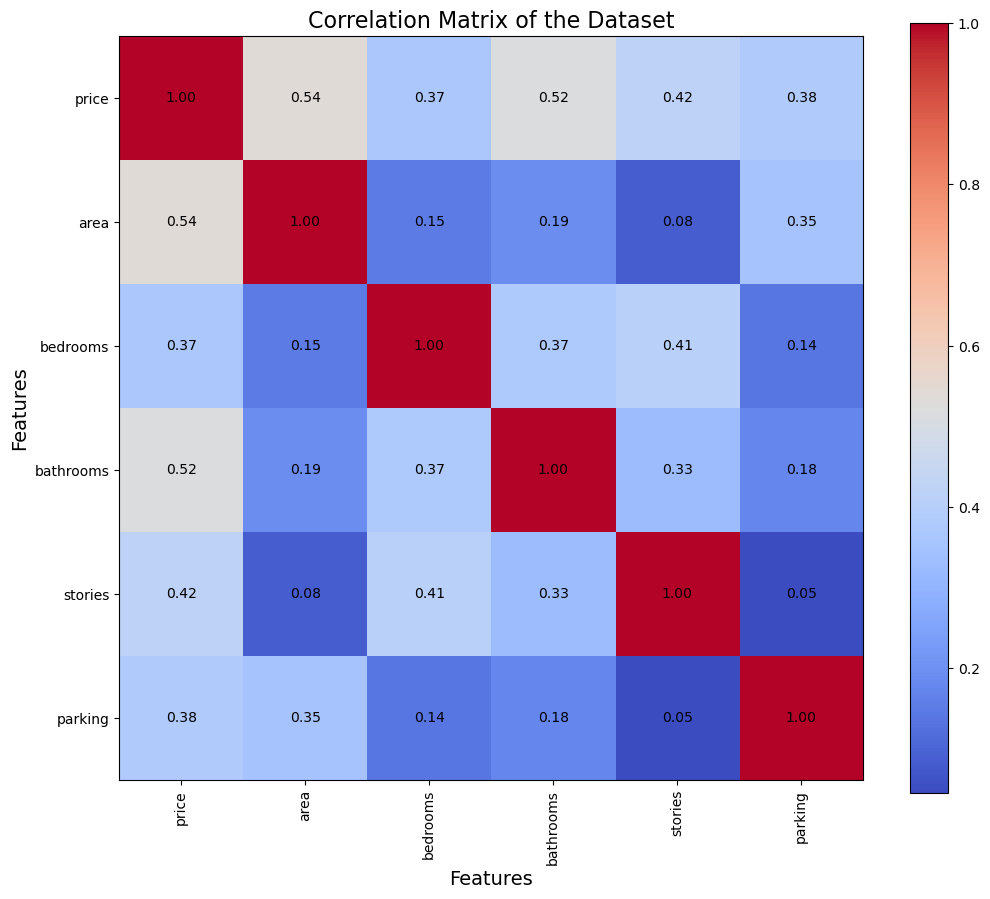

In [17]:

corr_matrix = numerical_features.corr()

# Set up the matplotlib figure to provide a good visual of the correlation matrix 
fig, ax = plt.subplots(figsize=(12, 10))

# Create a heatmap with annotations
cax = ax.imshow(corr_matrix, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set labels
ax.set_title('Correlation Matrix of the Dataset', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Add feature names
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_yticklabels(corr_matrix.columns)

# Add annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Display the plot
plt.show()

# Example of linearity with "Area" Feature

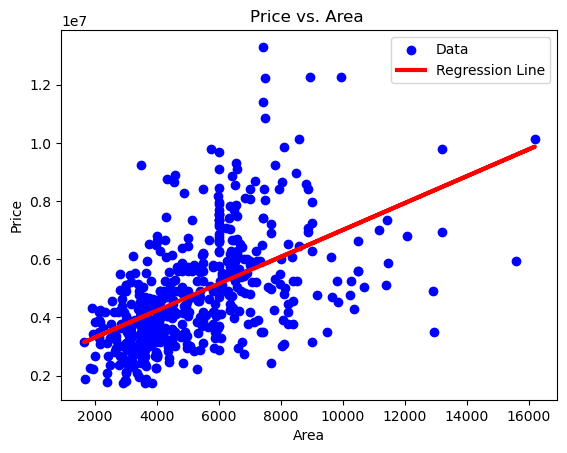

In [18]:
#Example just to see the relation between price and area (optional)
# the target 'price' is dependent the most with the feature 'area', here we plot the dependance between this 2 features
# Prepare features and target variable
X = house_data[['area']]
y = house_data['price']

model = LinearRegression()
model.fit(X, y)

# Predict house prices using the trained model
y_pred = model.predict(X)

# Plot the scatter plot of 'Price' vs. 'Area'
plt.scatter(X, y, color="blue", label="Data")

# Plot the regression line
plt.plot(X, y_pred, color="red", linewidth=3, label="Regression Line")

plt.xlabel('Area')
plt.ylabel('Price')
plt.title("Price vs. Area ")
plt.legend()
plt.show()
